In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
# Creating path
path = r'C:\Users\tomas\09-04-2024 World Happiness'

In [4]:
# Importing data set from pickle format
df = pd.read_pickle(os.path.join(path, '01 Data', 'Prepared Data', 'merged_.pkl'))

# Data cleaning

In [5]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [6]:
# Checking for missing values
df.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
Year                             0
dtype: int64

In [7]:
# Calculate the average of non-NaN values in the column
avg = df['Trust (Government Corruption)'].mean()
# Replace NaN values with the average
df['Trust (Government Corruption)'].fillna(avg, inplace=True)

In [8]:
# Checking for missing values
df.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
dtype: int64

In [9]:
# checking for duplicate values
df.duplicated().sum()

0

In [10]:
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.105749,0.122321
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.054250,0.130000
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.091033,0.201982
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.155861,0.278832
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075


# Removing non numeric columns

In [11]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [12]:
df.drop('Country', axis=1, inplace=True)

In [13]:
df.head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [14]:
# exporting dataset as xlsx format
df.to_excel(os.path.join(path, '01 Data', 'Prepared Data', 'merged_.xlsx'))

# The elbow technique

In [15]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [16]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 
score

C:\Users\tomas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tomas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\tomas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tomas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[-1597233.7538872105,
 -400711.3249891518,
 -179153.01435647922,
 -101704.94782994279,
 -65695.2303726063,
 -46248.21132397897,
 -34385.961101224544,
 -26750.058459787997,
 -21600.205527177775]

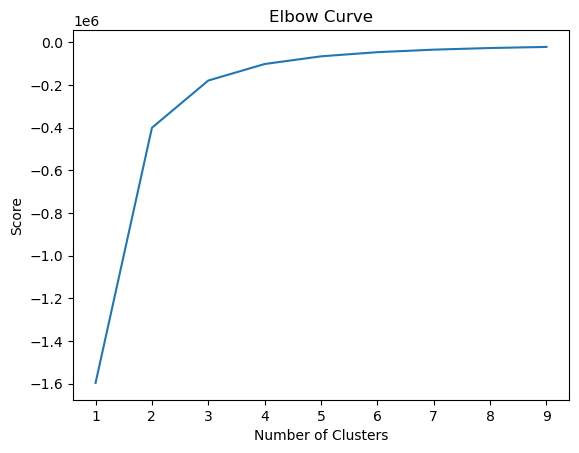

In [17]:
# Plot the elbow curve 
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The x-axis shows an increase from two to three, but then the curve straightens out. This suggests that the optimal number of clusters is three.

# k-means clustering

In [18]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [19]:
# Fit the k-means object to the data.
kmeans.fit(df)

C:\Users\tomas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tomas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3)

In [20]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\tomas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tomas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [21]:
df.head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,clusters
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,1
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,1
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,1
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,1
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,1


In [22]:
df['clusters'].value_counts()

clusters
1    265
2    260
0    257
Name: count, dtype: int64

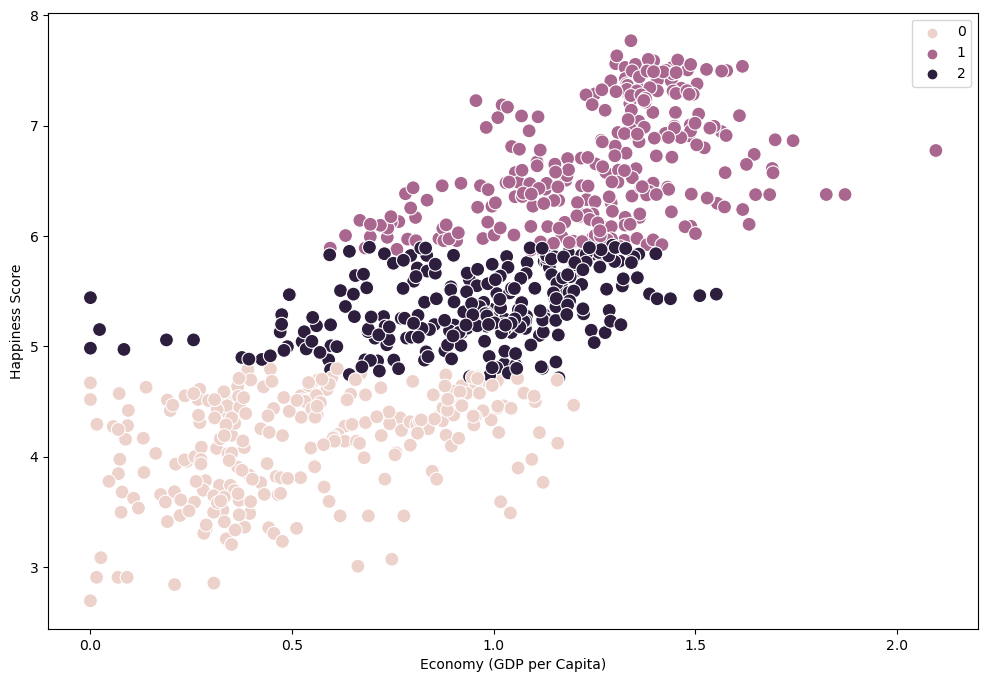

In [23]:
# Plot the clusters for the "Happiness Score" and "Economy (GDP per Capita)" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Economy (GDP per Capita)'], y=df['Happiness Score'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Economy (GDP per Capita)') 
plt.ylabel('Happiness Score') 
plt.show()

### Cluster 1 is in the middle range, cluster 2 shows a higher happiness score, and cluster 0 seems to be in the lower happiness score. 

### The scatterplot show a clear trend: when economy (GDP per capita) improves, so does happiness.

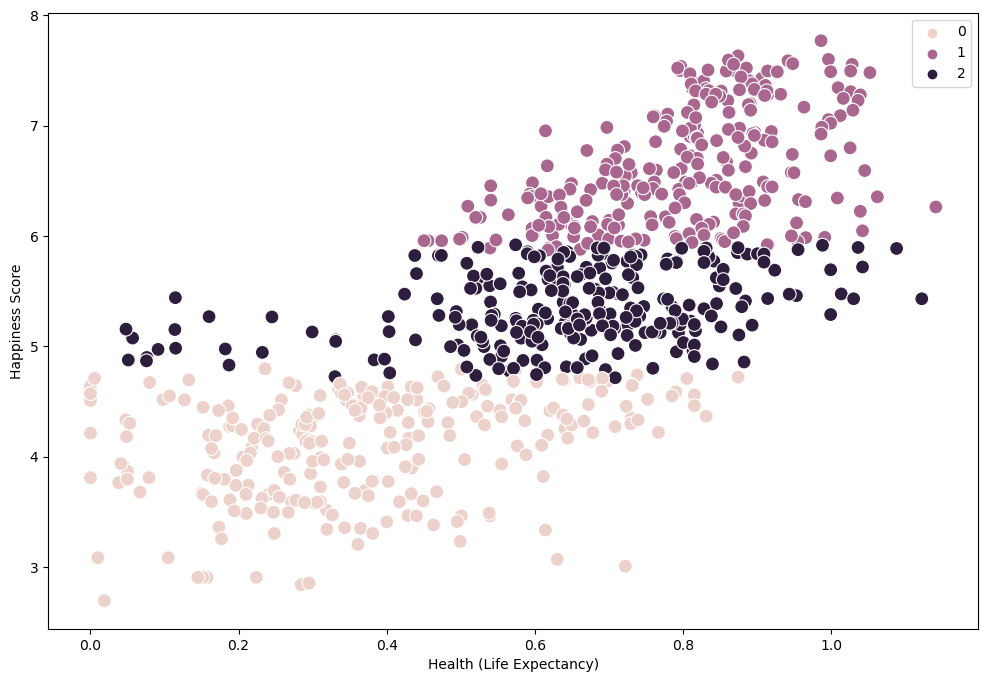

In [24]:
# Plot the clusters for the "Happiness Score" and "Health (Life Expectancy)" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Health (Life Expectancy)'], y=df['Happiness Score'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Health (Life Expectancy)') 
plt.ylabel('Happiness Score') 
plt.show()

### Cluster 1 is in the middle range, cluster 2 shows a higher happiness score, and cluster 0 seems to be in the lower happiness score. 

### The scatterplot show a clear trend: when health (life expectancy) improves, so does happiness.

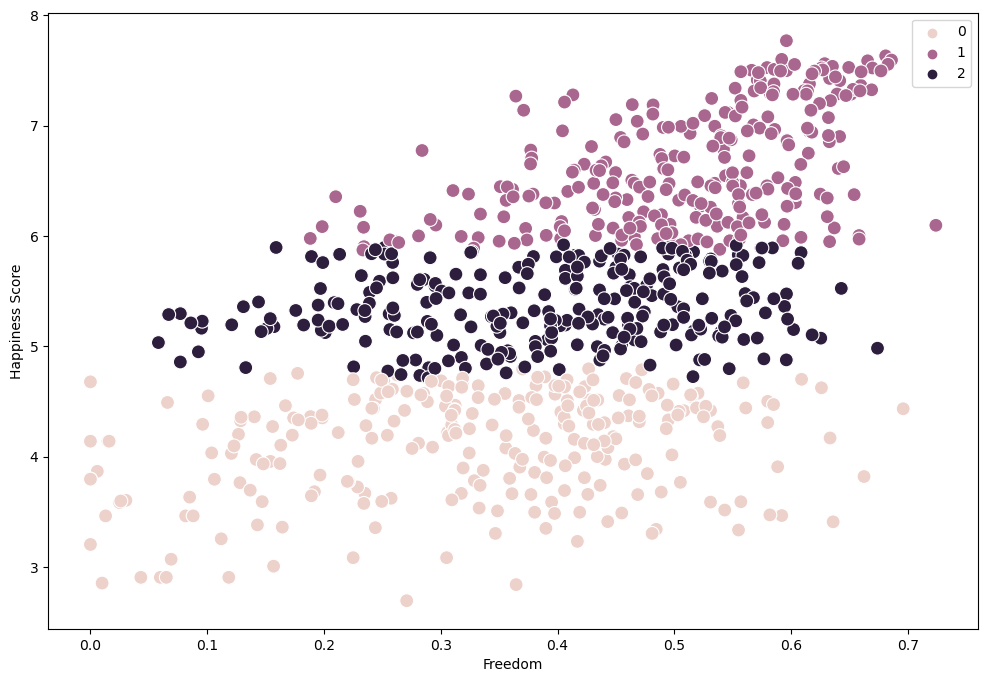

In [25]:
# Plot the clusters for the "Happiness Score" and "Freedom" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Freedom'], y=df['Happiness Score'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Freedom') 
plt.ylabel('Happiness Score') 
plt.show()

### Cluster 1 is in the middle range, cluster 2 shows a higher happiness score, and cluster 0 seems to be in the lower happiness score. 

### The scatterplot shows that when the freedom level declines, so does the happiness score, but it has less influence than, say, the economy.

In [26]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [27]:
df.groupby('cluster').agg({'Happiness Score':['mean', 'median'], 
                         'Economy (GDP per Capita)':['mean', 'median'], 
                         'Family':['mean', 'median'],
                         'Health (Life Expectancy)':['mean', 'median'],
                         'Freedom':['mean', 'median'],
                         'Trust (Government Corruption)':['mean', 'median'],
                         'Generosity':['mean', 'median']})

Happiness Score         Economy (GDP per Capita)            \
                       mean  median                     mean    median   
cluster                                                                  
dark purple        5.352827  5.3025                 0.953349  0.995769   
pink               4.107362  4.2180                 0.520847  0.460380   
purple             6.637981  6.5050                 1.262720  1.305000   

               Family           Health (Life Expectancy)             Freedom  \
                 mean    median                     mean    median      mean   
cluster                                                                        
dark purple  1.115724  1.160419                 0.650894  0.660785  0.388339   
pink         0.813200  0.850000                 0.378281  0.357000  0.329937   
purple       1.298952  1.323000                 0.801730  0.814870  0.512117   

                      Trust (Government Corruption)           Generosity  \
               median                          mean    median       mean   
cluster                                                                    
dark purple  0.406665                      0.088419  0.072743   0.190609   
pink         0.348588                      0.102883  0.087000   0.219466   
purple       0.535000                      0.183626  0.142000   0.245152   

                       
               median  
cluster                
dark purple  0.182425  
pink         0.202000  
purple       0.241800

# Step 10

### These results can be utilized to increase the happiness score in a country, knowing where to invest resources. 